In [38]:
import os
import sys
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath('../scripts'))
from load_data import missing_values, fill_missing_values
from hypothesis_test import *

In [39]:
file_path = '../MachineLearningRating_v3.csv'
data = load_data(file_path)

c:\Users\Tsega KisPay\Documents\GitHub\KF-AlphaCare-Insurance-Analytics\scripts\hypothesis_test.py:16: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


In [40]:
# fill missing values
if missing_values(data).any():
    data = fill_missing_values(data)
    print('Missing values filled')
else:
    print('No missing values')

c:\Users\Tsega KisPay\Documents\GitHub\KF-AlphaCare-Insurance-Analytics\scripts\load_data.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
c:\Users\Tsega KisPay\Documents\GitHub\KF-AlphaCare-Insurance-Analytics\scripts\load_data.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

Missing values filled


In [41]:
# Perform T-Test Function
t_test_result = perform_ttest(
    data[data['Gender'] == 'Female']['TotalClaims'],
    data[data['Gender'] == 'Male']['TotalClaims']
)
print(t_test_result)
print(f"T-Test p-value: {t_test_result:.4f}")

0.7669656471629475
T-Test p-value: 0.7670


In [42]:
# Perform Z-Test Function
p_value_z = perform_ztest(
    data[data['Province'] == 'A']['TotalClaims'],
    data[data['Province'] == 'B']['TotalClaims']
)
print(p_value_z)
print(f"Z-Test p-value: {p_value_z:.4f}")

nan
Z-Test p-value: nan


Hypothesis 1: Risk differences across provinces
Group A Mean (Gauteng): 74.63, Std: 2450.12
Group B Mean (KwaZulu-Natal): 84.23, Std: 2737.97
P-value: 0.2127



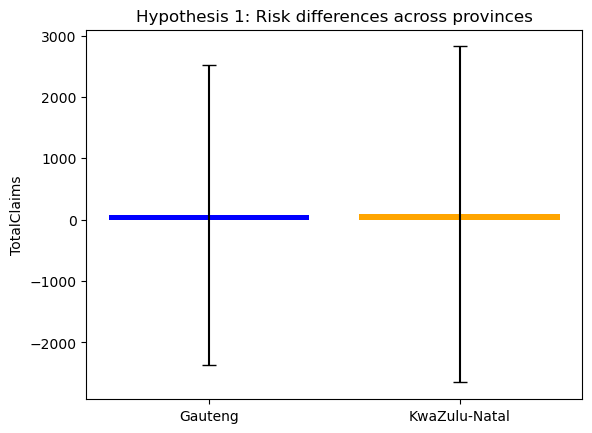

In [43]:
# Hypothesis 1: Risk differences across provinces
p_value_provinces = hypothesis_test_and_visualize(
    data, 'Province', 'TotalClaims',
    data['Province'].unique()[0], data['Province'].unique()[1],
    perform_ttest,
    "Hypothesis 1: Risk differences across provinces"
)

Hypothesis 2: Risk differences between postal codes
Group A Mean (1459): 0.00, Std: 0.00
Group B Mean (1513): 0.00, Std: 0.00
P-value: nan



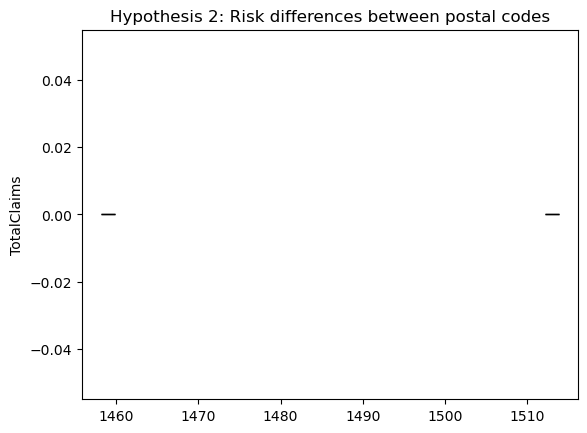

In [44]:
# Hypothesis 2: Risk differences between postal codes
p_value_postal = hypothesis_test_and_visualize(
    data, 'PostalCode', 'TotalClaims',
    data['PostalCode'].unique()[0], data['PostalCode'].unique()[1],
    perform_ttest,
    "Hypothesis 2: Risk differences between postal codes"
)

Hypothesis 3: Margin differences between postal codes
Group A Mean (1459): 73.87, Std: 170.37
Group B Mean (1513): 83.83, Std: 195.77
P-value: 0.6630



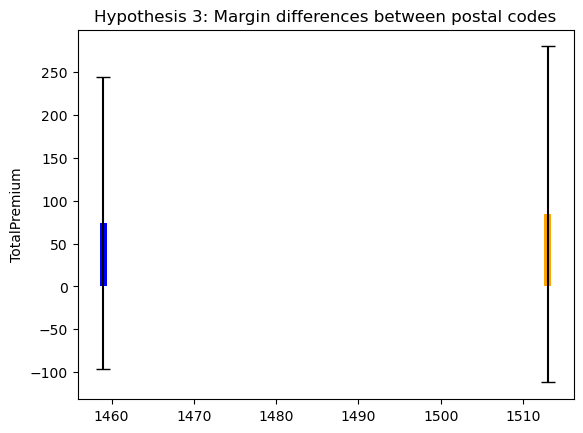

In [45]:
# Hypothesis 3: Margin differences between postal codes
p_value_margin = hypothesis_test_and_visualize(
    data, 'PostalCode', 'TotalPremium',
    data['PostalCode'].unique()[0], data['PostalCode'].unique()[1],
    perform_ttest,
    "Hypothesis 3: Margin differences between postal codes"
)

Hypothesis 4: Risk differences between Women and Men
Group A Mean (Female): 37.05, Std: 1094.09
Group B Mean (Male): 32.62, Std: 1400.63
P-value: 0.7670



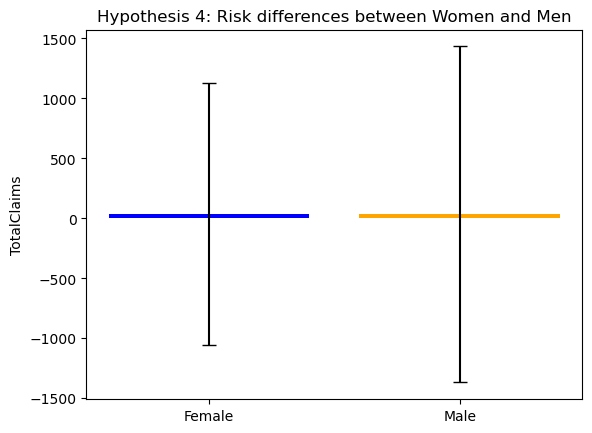

In [46]:
# Hypothesis 4: Risk differences between Women and Men
p_value_gender = hypothesis_test_and_visualize(
    data, 'Gender', 'TotalClaims',
    'Female', 'Male',
    perform_ttest,
    "Hypothesis 4: Risk differences between Women and Men"
)

In [47]:
# Call the function to display the conclusion
display_conclusion(p_value_provinces, p_value_postal, p_value_margin, p_value_gender, p_value_z)

=== Conclusion ===

1. Risk differences across provinces:
No significant difference in risk across provinces was found.

2. Risk differences between postal codes:
No significant difference in risk between postal codes was found.

3. Margin differences between postal codes:
No significant difference in margin between postal codes was found.

4. Risk differences between Women and Men:
No significant difference in risk between Women and Men was found.

5. Z-test result for risk difference between groups A and B:
No significant difference in risk between groups A and B was found.

=== Business Implications ===
Based on the results, consider focusing on postal codes or demographic factors where significant differences were observed. Further exploration of provinces might also be valuable if the p-values were marginally above the threshold.


In [48]:
# Interpret the p-value
result = interpret_p_value(p_value_provinces)
print(result)

Fail to Reject Null Hypothesis
